## **HYPERPARAMETER TUNING**

### **Pseudo**

In [146]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input, Dropout
import keras_tuner as kt

In [4]:
df = pd.read_csv("../datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [20]:
x = df.iloc[:,:-1]
y = df['Outcome']
print(x.head())
print("\n<------------------------------------Y------------------------------------->")
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0            6      148             72             35        0  33.6                     0.627   50
1            1       85             66             29        0  26.6                     0.351   31
2            8      183             64              0        0  23.3                     0.672   32
3            1       89             66             23       94  28.1                     0.167   21
4            0      137             40             35      168  43.1                     2.288   33

<------------------------------------Y------------------------------------->
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [23]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [26]:
model = Sequential()
model.add(Input(shape=(8, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [30]:
history = model.fit(x_train_scaled, y_train, batch_size=32, validation_data=(x_test_scaled,  y_test), epochs=50)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7818 - loss: 0.4306 - val_accuracy: 0.7922 - val_loss: 0.4538
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7834 - loss: 0.4303 - val_accuracy: 0.7987 - val_loss: 0.4541
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7883 - loss: 0.4299 - val_accuracy: 0.7987 - val_loss: 0.4539
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7883 - loss: 0.4294 - val_accuracy: 0.7987 - val_loss: 0.4542
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7899 - loss: 0.4288 - val_accuracy: 0.7987 - val_loss: 0.4536
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7915 - loss: 0.4285 - val_accuracy: 0.7987 - val_loss: 0.4547
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7883 - loss: 0.4287 - val_accuracy: 0.7987 - val_loss: 0.4550
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7899 - loss: 0.4279 - val_accuracy: 0.7987 - val_loss:

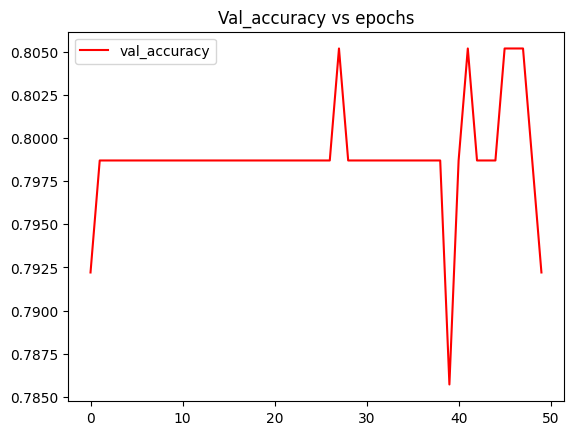

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'red')
ax.legend()
plt.title("Val_accuracy vs epochs")
plt.show()

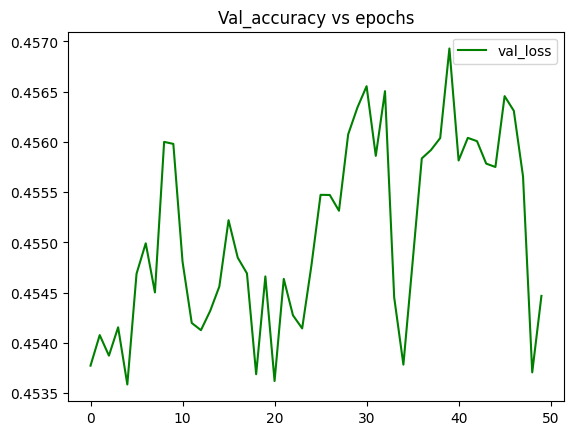

In [46]:
fig, ax = plt.subplots()
ax.plot(history.history['val_loss'], label = 'val_loss', color = 'green')
ax.legend()
plt.title("Val_accuracy vs epochs")
plt.show()

### **TUNING THE OPTIMIZER**

In [60]:
def build_model(hp):
    
    model = Sequential()
    model.add(Input(shape=(8, )))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizers = hp.Choice('optimizers', ['adam', 'rmsprop', 'sgd', 'adagrad', 'nag', 'lion', 'mini batch gradient descent', 'adadelta'])
    
    model.compile(optimizer=optimizers, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model
    
    

In [61]:
tuner = kt.RandomSearch(build_model, max_trials=5, objective='val_accuracy')

In [65]:
tuner.search(x_train_scaled, y_train, epochs = 20, validation_data = (x_test_scaled, y_test), batch_size = 32, project_name = 'some_project', directory = 'some_directory')

In [66]:
tuner.get_best_hyperparameters()[0].values

{'optimizers': 'rmsprop'}

In [67]:
tuner.get_best_models(num_models=1)[0]

<Sequential name=sequential, built=True>

In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [69]:
model.fit(x_train_scaled, y_train, batch_size=32, validation_data=(x_test_scaled,  y_test), initial_epoch=50, epochs=100)

Epoch 51/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.4157 - val_accuracy: 0.7922 - val_loss: 0.4544
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8046 - loss: 0.4154 - val_accuracy: 0.7922 - val_loss: 0.4537
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8078 - loss: 0.4158 - val_accuracy: 0.7987 - val_loss: 0.4552
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 - loss: 0.4147 - val_accuracy: 0.7987 - val_loss: 0.4557
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 - loss: 0.4147 - val_accuracy: 0.8052 - val_loss: 0.4553
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 - loss: 0.4146 - val_accuracy: 0.8052 - val_loss: 0.4568
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 0.4149 - val_accuracy: 0.8052 - val_loss: 0.4551
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8078 - loss: 0.4147 - val_accuracy: 0.

### **TUNING THE NUMBER OF NEURONS PER LAYER**

In [89]:
def build_model2(hp):
    
    model  = Sequential()
    
    units = hp.Int( 'units', min_value = 10, max_value = 120 )
    
    model.add( Input(shape=(8, )) )
    model.add( Dense( units=units, activation='relu' ))
    model.add( Dense( 1, activation='sigmoid' ))
    
    model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'] )
    
    return model
    
    

In [95]:
tuner2 = kt.RandomSearch(build_model2, max_trials=5, objective='val_accuracy', directory = 'some_name', project_name = 'tuning')

In [96]:
tuner2.search(x_train_scaled, y_train, batch_size = 32, validation_data = (x_test_scaled, y_test), epochs = 20)

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 16s


In [100]:
tuner2.get_best_hyperparameters()[0].values

{'units': 80}

In [102]:
model =tuner2.get_best_models(num_models=1)[0]

In [104]:
history = model.fit(x_train_scaled, y_train, batch_size=32, epochs=100, initial_epoch=51, validation_data=(x_test_scaled, y_test))

Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8013 - loss: 0.4105 - val_accuracy: 0.8117 - val_loss: 0.4599
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8046 - loss: 0.4110 - val_accuracy: 0.8117 - val_loss: 0.4589
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.4099 - val_accuracy: 0.8117 - val_loss: 0.4588
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.4090 - val_accuracy: 0.8052 - val_loss: 0.4584
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8062 - loss: 0.4087 - val_accuracy: 0.8052 - val_loss: 0.4610
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8094 - loss: 0.4074 - val_accuracy: 0.8052 - val_loss: 0.4609
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.4079 - val_accuracy: 0.8182 - val_loss: 0.4600
Epoch 59/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8094 - loss: 0.4075 - val_accuracy: 0.

### **TUNING THE NUMBER OF LAYERS**

In [116]:
def build_model3(hp):
    model = Sequential()
    
    
    model.add(Dense(70, activation='relu', input_dim = 8))
    
    for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
        
        model.add(Dense(70, activation='relu' ))
        
        
        
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model
    

In [117]:
tuner3 = kt.RandomSearch(build_model3, max_trials=5, objective='val_accuracy', directory = 'some_name', project_name = 'num_of_layers')

c:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
tuner3.search(x_train_scaled, y_train, batch_size=32, epochs = 50, validation_data = (x_test_scaled, y_test))

Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 00m 39s


In [119]:
tuner3.get_best_hyperparameters()[0].values

{'num_layers': 7}

In [121]:
model = tuner3.get_best_models(num_models=1)[0]

In [123]:
model.fit(x_train_scaled, y_train, batch_size=32, epochs = 100, initial_epoch=51, validation_data = (x_test_scaled, y_test))

Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9837 - loss: 0.0448 - val_accuracy: 0.7078 - val_loss: 1.8982
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9739 - loss: 0.0829 - val_accuracy: 0.7273 - val_loss: 1.7023
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9870 - loss: 0.0382 - val_accuracy: 0.7273 - val_loss: 1.7656
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.7273 - val_loss: 1.7142
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0226 - val_accuracy: 0.7273 - val_loss: 1.7740
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9935 - loss: 0.0196 - val_accuracy: 0.7338 - val_loss: 2.0341
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9723 - loss: 0.0875 - val_accuracy: 0.7468 - val_loss: 1.8913
Epoch 59/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9886 - loss: 0.0309 - val_accuracy: 0.

### **TUNING ALL THE HYPERPARAMETERS AT ONCE**

In [147]:
def build_model4(hp):
    model = Sequential()
    
    count = 0
    
    for i in range(hp.Int('num_layers', min_value= 1, max_value = 10)):
        if count ==0:
            model.add(
                Dense(
                    hp.Int('unit' + str(i), min_value = 10, max_value = 120, step = 2),
                    activation=hp.Choice('activation' + str(i), ['tanh', 'relu', 'sigmoid']),  
                    input_dim = 8              
                    )
                    )
            model.add(Dropout(hp.Choice('Dropout' + str(i), [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) )
        else:
            
            model.add(
                Dense(
                    hp.Int('unit' + str(i), min_value = 10, max_value = 120, step = 2),
                    activation=hp.Choice('activation' + str(i), ['tanh', 'relu', 'sigmoid']),              
                    )
                    )
            model.add(Dropout(hp.Choice('Dropout' + str(i), [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])) )
        count+=1
    
    model.add( Dense( 1, activation='sigmoid' ))
    
    model.compile(optimizer=hp.Choice('optimizers', ['rmsprop', 'adadelta', 'sgd', 'nag', 'lion', 'nadam', 'adagrad']), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model
            
        

In [148]:
tuner4 = kt.RandomSearch(build_model4, objective='val_accuracy', max_trials = 4, directory = 'some_name', project_name = 'final' )

Reloading Tuner from some_name\final\tuner0.json


In [149]:
tuner4.search(x_train_scaled, y_train, batch_size = 32, epochs = 5, validation_data = (x_test_scaled, y_test))

In [150]:
tuner4.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'unit0': 44,
 'activation0': 'relu',
 'optimizers': 'nadam',
 'unit1': 32,
 'activation1': 'tanh',
 'unit2': 90,
 'activation2': 'relu',
 'unit3': 56,
 'activation3': 'tanh',
 'unit4': 68,
 'activation4': 'relu',
 'unit5': 10,
 'activation5': 'tanh',
 'unit6': 10,
 'activation6': 'tanh',
 'unit7': 10,
 'activation7': 'tanh',
 'unit8': 10,
 'activation8': 'tanh'}

In [151]:
model = tuner4.get_best_models(num_models=1)[0]

c:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 43 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model.fit(x_train_scaled, y_train, epochs=100, initial_epoch=50, batch_size=32, validation_data=(x_test_scaled, y_test))